Import packages

In [7]:
import cv2
import numpy as np
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt
import os
import csv
import pandas as pd
import torch.nn as nn
import torch
from transformers import get_cosine_schedule_with_warmup

Load Cyberzoo corner points

In [8]:
cyberzoo_green_width = 7
cyberzoo_green_length = 7
z_min = 0

corner_coordinates = {
            'A': {'x' : cyberzoo_green_width/2,
                'y' : cyberzoo_green_length/2,
                'z' : z_min},
            'B': {'x' : -cyberzoo_green_width/2,
                'y' : cyberzoo_green_length/2,
                'z' : z_min},
            'C': {'x' : -cyberzoo_green_width/2,
                'y' : -cyberzoo_green_length/2,
                'z' : z_min},
            'D': {'x' : cyberzoo_green_width/2,
                'y' : -cyberzoo_green_length/2,
                'z' : z_min}
        }

In [9]:
# Initialize global variables
point_clicked_img = None
img = None

# Callback function for mouse events
def click_event(event, x, y, flags, param):
    global point_clicked_img, img
    if event == cv2.EVENT_LBUTTONDOWN:  # Left mouse button clicked
        point_clicked_img = ((x, y))  # Append the (x, y) tuple to the list
        print(f'Coordinates: ({x}, {y})')  # Print coordinates of the click
        cv2.circle(img, (x, y), 5, (255, 0, 0), -1)  # Mark the clicked point with a blue circle
        
        cv2.imshow('image', img)  # Show the image with the marked point
    return point_clicked_img

def clicker_call(image_path):
    global img, point_clicked_img
    # Load your image
    img = cv2.imread(image_path)
    # Rotate the image 90 counter
    img = cv2.rotate(img, cv2.ROTATE_90_COUNTERCLOCKWISE)
    # Make image brighter
    img = cv2.convertScaleAbs(img, alpha=1.5, beta=0)
    cv2.imshow('image', img)

    # Set mouse callback function for 'image' window
    cv2.setMouseCallback('image', click_event)

    # What to press 'a' 'b' 'c' or 'd' and go into a if statement
    
    # Back is the closed way opposite the netted wall
    # A : right back
    # B : right front
    # C : left front
    # D : left back

    k = cv2.waitKey(0)
    if k == ord('a'):
        # Cyberzoo coordinate a
        X = corner_coordinates['A']['x']
        Y = corner_coordinates['A']['y']
        Z = corner_coordinates['A']['z']
        point_clicked_xyz = (X, Y, Z)
        corner_label = 'A'
    if k == ord('b'):
        # Cyberzoo coordinate b
        X = corner_coordinates['B']['x']
        Y = corner_coordinates['B']['y']
        Z = corner_coordinates['B']['z']
        point_clicked_xyz = (X, Y, Z)
        corner_label = 'B'

    if k == ord('c'):
        # Cyberzoo coordinate c
        X = corner_coordinates['C']['x']
        Y = corner_coordinates['C']['y']
        Z = corner_coordinates['C']['z']
        point_clicked_xyz = (X, Y, Z)
        corner_label = 'C'
    if k == ord('d'):
        # Cyberzoo coordinate d
        X = corner_coordinates['D']['x']
        Y = corner_coordinates['D']['y']
        Z = corner_coordinates['D']['z']
        point_clicked_xyz = (X, Y, Z)
        corner_label = 'D'  

    cv2.waitKey(0)  # Wait for a key press to exit
    cv2.destroyAllWindows()  # Close all OpenCV windows

    # Optionally, print all clicked points
    print('clicked point:', point_clicked_img)

    return point_clicked_img, point_clicked_xyz, corner_label


images_path = r"C:\Users\Jonathan van Zyl\Documents\GitHub\paparazzi\Data_gitignore\AE4317_2019_datasets\cyberzoo_poles_panels\20190121-140205"
file_path = "Data_gitignore/AE4317_2019_datasets/cyberzoo_poles_panels/20190121-140303.csv"
frame_files = sorted(os.listdir(images_path))

no_images = len(frame_files)
max_iters = 200
steps_between_image = int(no_images/max_iters)
stop_iter = steps_between_image*max_iters

print(0, stop_iter, steps_between_image)
# Open the CSV file in write mode
with open('output.csv', 'w', newline='') as file:
    writer = csv.writer(file)
    # Write the header
    writer.writerow(["image_name", "image_x", "image_y", "x", "y", "z", "corner_label"])
    for i in range(0, stop_iter, steps_between_image):
        
        image_path = os.path.join(images_path, frame_files[i])

        point_clicked_img, point_clicked_xyz, corner_label = clicker_call(image_path)

        print('point clicked image:', point_clicked_img)
        print('point clicked xyz:', point_clicked_xyz)

        image_name = frame_files[i]

        # Write the data to the CSV file
        writer.writerow([image_name, point_clicked_img[0], point_clicked_img[1], point_clicked_xyz[0], point_clicked_xyz[1], point_clicked_xyz[2], corner_label])

        # Stop if q is pressed
        k = cv2.waitKey(0)
        if k == ord('q'):
            break



0 400 2


In [ ]:
# From the csv file add the images selected to a new folder "CornerPointsLabelled"
images_path = r"C:\Users\Jonathan van Zyl\Documents\GitHub\paparazzi\Data_gitignore\AE4317_2019_datasets\cyberzoo_poles_panels\20190121-140205"
# Clear Folder
folder = "CornerPointsLabelled"
for the_file in os.listdir(folder):
    file_path = os.path.join(folder, the_file)
    try:
        if os.path.isfile(file_path):
            os.unlink(file_path)
    except Exception as e:
        print(e)

# Read the csv file
df = pd.read_csv('output.csv')
# Iterate through the rows of the csv file
for index, row in df.iterrows():
    # Get the image name from the row
    image_name = row['image_name']
    # Get the corner label from the row
    corner_label = row['corner_label']
    # Get the image path
    image_path = os.path.join(images_path, image_name)
    # Read the image
    img = cv2.imread(image_path)
    # Rotate the image 90 counter
    img = cv2.rotate(img, cv2.ROTATE_90_COUNTERCLOCKWISE)
    # Get the image coordinates
    x = int(row['image_x'])
    y = int(row['image_y'])
    # Draw a circle on the image where the corner was selected
    cv2.circle(img, (x, y), 5, (255, 0, 0), -1)  # Mark the clicked point with a blue circle
    # Save the image to the "CornerPointsLabelled" folder
    cv2.imwrite(os.path.join(folder, image_name), img)

Load the state vector's data

In [ ]:
# Load the data
'''
image_name,time,pos_x,pos_y,pos_z,vel_x,vel_y,vel_z,att_phi,att_theta,att_psi
'100049163.jpg',100.049163,0.078125,-1.066406,-1.003906,0.008807465540194464,-0.003436465540194465,0.4858215344598055
'''

def state_arrays(file_path):
        df = pd.read_csv(file_path)
        # Convert the DataFrame into a dictionary of arrays
        data = df.to_dict('list')

        # Now data is a dictionary where the keys are the column names and the values are lists of column values
        time_array = data['time']
        x_pos_array = data['pos_x']
        y_pos_array = data['pos_y']
        z_pos_array = data['pos_z']
        theta_array = data['att_theta']
        psi_array = data['att_psi']
        phi_array = data['att_phi']

        return time_array, x_pos_array, y_pos_array, z_pos_array, theta_array, psi_array, phi_array

file_path_csv_state_vector = r"C:\Users\Jonathan van Zyl\Documents\GitHub\paparazzi\Data_gitignore\AE4317_2019_datasets\cyberzoo_poles_panels\20190121-140303.csv"

time_array, x_pos_array, y_pos_array, z_pos_array, theta_array, psi_array, phi_array = state_arrays(file_path_csv_state_vector)


Extract point needed

In [ ]:
rewrite_csv = True

csv_file_path = r"C:\Users\Jonathan van Zyl\Documents\GitHub\paparazzi\COMPUTERVISIONSIM\Projection\StateVector.csv"

if rewrite_csv:
    def interpolate_csv(time_array, x_pos_array, y_pos_array, z_pos_array, theta_array, psi_array, phi_array, time):
        # Interpolate the arrays with time array and output corresponding value
        interpolated_state_vector = {}
        interpolated_state_vector['time'] = time
        interpolated_state_vector['x_pos'] = np.interp(time, time_array, x_pos_array)
        interpolated_state_vector['y_pos'] = np.interp(time, time_array, y_pos_array)
        interpolated_state_vector['z_pos'] = np.interp(time, time_array, z_pos_array)
        interpolated_state_vector['theta'] = np.interp(time, time_array, theta_array)
        interpolated_state_vector['psi'] = np.interp(time, time_array, psi_array)
        interpolated_state_vector['phi'] = np.interp(time, time_array, phi_array)
        return interpolated_state_vector

    time_array, x_pos_array, y_pos_array, z_pos_array, theta_array, psi_array, phi_array = state_arrays(file_path_csv_state_vector)

    def find_time_of_image(image_name):
        # XXXXXXXX.jpg -> SS.XXXXXX jpg SS is seconds i.e. 60483805.jpg -> 60.483805 seconds
        time = int(image_name.split('.')[0])/1000000
        return time

    # Write title to the csv file : image_name, time, x_pos, y_pos, z_pos, theta, psi, phi
    with open(csv_file_path, 'w', newline='') as file:
        writer = csv.writer(file)
        writer.writerow(["image_name", "time", "x_pos", "y_pos", "z_pos", "theta", "psi", "phi"])

    # Loop throught the images in the "CornerPointsLabelled" folder and write the interpolated state vector to the csv file
    for image_name in os.listdir(folder):
        time = find_time_of_image(image_name)
        interpolated_state_vector = interpolate_csv(time_array, x_pos_array, y_pos_array, z_pos_array, theta_array, psi_array, phi_array, time)
        with open(csv_file_path, 'a', newline='') as file:
            writer = csv.writer(file)
            writer.writerow([image_name, interpolated_state_vector['time'], interpolated_state_vector['x_pos'], interpolated_state_vector['y_pos'], interpolated_state_vector['z_pos'], interpolated_state_vector['theta'], interpolated_state_vector['psi'], interpolated_state_vector['phi']])

NameError: name 'state_arrays' is not defined

Rotate and translate the camera points into the drone reference frame and add as extra columns to Output.csv

In [ ]:
'''
Rotate and translate the camera points into the drone reference frame and add as extra columns to Output.csv
image_name,image_x,image_y,x,y,z,corner_label
100049163.jpg,226,156,3.5,3.5,0,A
100282495.jpg,231,155,3.5,3.5,0,A
100482507.jpg,231,156,3.5,3.5,0,A
'''

# Extract data x,y,z from the csv file
points3D_world_XYZ = np.genfromtxt('output.csv', delimiter=',', skip_header=1, usecols=(3, 4, 5)) # (x, y, z) : (N, 3)

# Rotate and translate the camera points into the drone reference frame
def update_camera_rotation_matrix(theta, psi, phi):
            # Converting from [-pi, pi] to [0, 2pi]:
            if phi < 0:
                roll = 2 * np.pi + phi
            else:
                roll = phi
            if psi < 0:
                yaw = 2 * np.pi + psi
            else:
                yaw = psi
            pitch = theta

            Rx = np.array([[1, 0, 0],
                   [0, np.cos(roll), -np.sin(roll)],
                   [0, np.sin(roll), np.cos(roll)]])

            Ry = np.array([[np.cos(pitch), 0, np.sin(pitch)],
                        [0, 1, 0],
                        [-np.sin(pitch), 0, np.cos(pitch)]])

            Rz = np.array([[np.cos(yaw), -np.sin(yaw), 0],
                        [np.sin(yaw), np.cos(yaw), 0],
                        [0, 0, 1]])

            # The order of multiplication depends on the convention used. This uses ZYX (yaw-pitch-roll).
            R = np.dot(Rz, np.dot(Ry, Rx))
            return R

# Loop over the images in the "CornerPointsLabelled" folder and add the rotated and translated points to the csv file
# Loop over the image_name columns in Output.csv
with open('Translated.csv', 'w', newline='') as file:
        writer = csv.writer(file)
        writer.writerow(["image_name", "x", "y", "z"])
folder = "CornerPointsLabelled"
points3D_drone_array = np.empty((len(os.listdir(folder)), 3), dtype=float)
with open('Translated.csv', 'w', newline='') as file:
    # Write on a new line
    writer = csv.writer(file)
    writer.writerow(["image_name", "x", "y", "z"])
    for image_name in os.listdir(folder):
        # Get the time from the image name
        time = find_time_of_image(image_name)
        # Interpolate the state vector
        interpolated_state_vector = interpolate_csv(time_array, x_pos_array, y_pos_array, z_pos_array, theta_array, psi_array, phi_array, time)
        # Get the rotation matrix
        R = update_camera_rotation_matrix(interpolated_state_vector['theta'], interpolated_state_vector['psi'], interpolated_state_vector['phi'])
        # Get the translation vector
        T = np.array([interpolated_state_vector['x_pos'], interpolated_state_vector['y_pos'], interpolated_state_vector['z_pos']])
        
        # Convert points3D_world_XYZ -> points3D_drone_XYZ
        points3D_drone_XYZ = np.dot(R, points3D_world_XYZ.T).T - T
        # Add the points to the points3D_drone_array
        points3D_drone_array = np.vstack((points3D_drone_array, points3D_drone_XYZ[0]))

        # Write the points3D_drone_XYZ to the csv file add extra columns to Translated.csv, Using Output.csv as the first columns
        writer.writerow([image_name, points3D_drone_XYZ[0][0], points3D_drone_XYZ[0][1], points3D_drone_XYZ[0][2]])
    

Start here if csv files made / data labelled.

In [ ]:
# Load x y z from the csv file
points3D_drone_XYZ = np.genfromtxt('Translated.csv', delimiter=',', skip_header=1, usecols=(1, 2, 3)) # (x, y, z) : (N, 3)

In [ ]:
def apply_camera_model(predicted_params, points_3d):
    """
    Apply the camera model to project 3D points to 2D using predicted camera parameters.
    
    :param predicted_params: Tensor containing the predicted camera parameters [f_x, f_y, c_x, c_y, k1, k2, k3, p_1, p_2]
    :param points_3d: Tensor containing 3D points in camera coordinates, shape [N, 3]
    :return: Tensor containing the projected 2D points, shape [N, 2]
    """
    predicted_params = predicted_params.squeeze()

    f_x, f_y, c_x, c_y, k1, k2, k3, p_1, p_2 = predicted_params

    f_x =  f_x
    f_y = f_y 
    c_x = c_x 
    c_y = c_y 
    #print(f_x, f_y, c_x, c_y, k1, k2, k3, p_1, p_2)

    # Unpack K matrix
    
    # Normalize 3D points (X_c/Z_c, Y_c/Z_c)
    X_c = points_3d[:, 0]
    Y_c = points_3d[:, 1]
    Z_c = points_3d[:, 2]
    x_normalized = X_c / Z_c
    y_normalized = Y_c / Z_c
    
    # Compute r^2 = x_normalized^2 + y_normalized^2
    r_squared = x_normalized**2 + y_normalized**2
    
    # Apply radial distortion correction
    radial_factor = 1 + k1 * r_squared + k2 * r_squared**2 + k3 * r_squared**3
    x_radial = x_normalized * radial_factor
    y_radial = y_normalized * radial_factor
    
    # Apply tangential distortion correction
    x_tangential = 2 * p_1 * x_normalized * y_normalized + p_2 * (r_squared + 2 * x_normalized**2)
    y_tangential = p_1 * (r_squared + 2 * y_normalized**2) + 2 * p_2 * x_normalized * y_normalized
    
    # Combine radial and tangential distortions
    x_distorted = x_radial + x_tangential
    y_distorted = y_radial + y_tangential
    
    # Convert distorted coordinates back to pixel coordinates
    u = f_x * x_distorted + c_x
    v = f_y * y_distorted + c_y
    
    # Stack the 2D points into a single tensor
    points_2d = torch.stack([u, v], dim=-1)

    img_width = 240
    img_height = 520

    # Normalise the points
    points_2d[:, 0] = points_2d[:, 0] / img_width
    points_2d[:, 1] = points_2d[:, 1] / img_height

    print('points2D:', points_2d)
    
    return points_2d

In [ ]:
class CameraParameterEstimator(nn.Module):
    def __init__(self, initial_params):
        super(CameraParameterEstimator, self).__init__()
        self.fc1 = nn.Linear(3, 512)  # 3 input features (X_c, Y_c, Z_c)
        self.fc2 = nn.Linear(512, 256)
        self.fc3 = nn.Linear(256, 128)
        self.fc4 = nn.Linear(128, 64)
        self.fc5 = nn.Linear(64, 32)
        self.fc6 = nn.Linear(32, 9)  # 9 output features (f_x, f_y, c_x, c_y, k1, k2, k3, p_1, p_2)

        # Initialize fc5 weights with initial_params
        with torch.no_grad():
            self.fc6.bias = nn.Parameter(torch.tensor(initial_params))
        

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = torch.relu(self.fc3(x))
        x = torch.relu(self.fc4(x))
        x = torch.relu(self.fc5(x))
        output = self.fc6(x)

        # Apply custom transformation to the last five outputs so they are between -0.1 and 0.1
        output[:, 4:] = 0.4 * torch.sigmoid(output[:, 4:]) - 0.1
        
        
        return output


In [ ]:
K_initial_guess = np.array([[323.94986777, 0, 265.6212057 ],
                  [ 0, 324.58989285, 213.41963136],
                  [ 0, 0, 1 ]])
        
D_initial_guess = np.array([[-0.03146083],
                  [-0.03191633],
                  [ 0.05678013],
                  [-0.04003636]])

# initial_params : [f_x, f_y, c_x, c_y, k1, k2, k3, p_1, p_2]
f_x = K_initial_guess[0, 0]
f_y = K_initial_guess[1, 1]
c_x = K_initial_guess[0, 2]
c_y = K_initial_guess[1, 2]
k1, k2, k3, p_1= D_initial_guess
p_2 = 0
initial_params = [f_x, f_y, c_x, c_y, k1[0], k2[0], k3[0], p_1[0], p_2]
print(initial_params)

[323.94986777, 324.58989285, 265.6212057, 213.41963136, -0.03146083, -0.03191633, 0.05678013, -0.04003636, 0]


In [ ]:
# Check if CUDA is available and set the device accordingly
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
# Print if CUDA is available
print(f'Using {device} device')

Using cpu device


In [ ]:
# Convert the points3D_drone_XYZ to a tensor
points3D_drone_XYZ_tensor = torch.tensor(points3D_drone_XYZ, dtype=torch.float32)

input_3d_points = points3D_drone_XYZ_tensor

'''
image_name,image_x,image_y,x,y,z,corner_label
100049163.jpg,226,156,3.5,3.5,0,A
100282495.jpg,231,155,3.5,3.5,0,A

Extract image_x and image_y from the csv file : Output.csv
'''

# Load x y from the csv file
points2D_target = np.genfromtxt('output.csv', delimiter=',', skip_header=1, usecols=(1, 2)) # (x, y) : (N, 2)
img_width = 240
img_height = 520

# Normalise the points
points2D_target[:, 0] = points2D_target[:, 0] / img_width
points2D_target[:, 1] = points2D_target[:, 1] / img_height

target_2d_points = torch.tensor(points2D_target, dtype=torch.float32)

print(target_2d_points.shape)

# Print first 5
print(input_3d_points[:5])
print(target_2d_points[:5])

# Write the target_2d_points and input_3d_points to a csv file
with open('points.csv', 'w', newline='') as file:
    writer = csv.writer(file)
    writer.writerow(["x_3d", "y_3d", "z_3d", "x_2d", "y_2d"])
    for i in range(len(input_3d_points)):
        writer.writerow([input_3d_points[i][0], input_3d_points[i][1], input_3d_points[i][2], target_2d_points[i][0], target_2d_points[i][1]])
    

torch.Size([197, 2])
tensor([[1.3826, 5.7955, 1.0468],
        [1.2820, 5.7288, 1.0245],
        [1.2139, 5.6773, 1.0132],
        [1.1241, 5.6148, 1.0042],
        [1.0080, 5.5364, 1.0029]])
tensor([[0.9583, 0.3000],
        [0.9458, 0.3058],
        [0.9458, 0.3058],
        [0.9458, 0.3058],
        [0.9458, 0.3058]])


In [ ]:
class CustomMSELoss(nn.Module):
    def __init__(self):
        super(CustomMSELoss, self).__init__()

    def forward(self, predicted_2d_points, target_2d_points):
        # Extract x and y coordinates from predicted and target 2D points
        # Predicted 2D points shape: (N, 2) : with 2 is x y
        # Target 2D points shape: (N, 2) : with 2 is x y
        print(predicted_2d_points.shape, target_2d_points.shape)
        predicted_x = predicted_2d_points[:, 0]
        predicted_y = predicted_2d_points[:, 1]
        target_x = target_2d_points[:, 0]
        target_y = target_2d_points[:, 1]
        print(predicted_x.shape, target_x.shape)
        print(predicted_y.shape, target_y.shape)

        print(predicted_x[:5], target_x[:5])

        # Check for extreme values or Nan
        if torch.isnan(predicted_x).any() or torch.isnan(predicted_y).any():
            print('Predicted x or y contains NaN')
        # Check if inf
        if torch.isinf(predicted_x).any() or torch.isinf(predicted_y).any():
            print('Predicted x or y contains inf')

        squared_x_error = (predicted_x - target_x)**2
        print('squared_x_error', squared_x_error)
        # Find index where is inf and print corresponding values
        inf_indices = torch.isinf(squared_x_error)
        print('inf_indices', inf_indices)
        print('squared_x_error inf_indices', squared_x_error[inf_indices])
        print('predicted_x inf_indices', predicted_x[inf_indices])
        print('target_x inf_indices', target_x[inf_indices])
        
        # Compute the mean squared error for x and y coordinates
        mse_loss_x = torch.mean((predicted_x - target_x)**2)
        print('mse_loss_x', mse_loss_x)
        mse_loss_y = torch.mean((predicted_y - target_y)**2)
        print('mse_loss_y', mse_loss_y)
        
        return (mse_loss_x + mse_loss_y) / 2

# Make MSE loss function, takes in (x,y) pairs
#loss_fn = nn.MSELoss()
loss_fn = CustomMSELoss()

In [ ]:
num_epochs = 2000



# Create an instance of the model
model = CameraParameterEstimator(initial_params)

# Convert the model's parameters to Float type
model = model.float()

# Create an instance of the optimizer
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)
scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer, 'min', factor=0.9, patience=50, verbose=True)
# Number of training steps is number of epochs times number of batches
# Assuming one batch per epoch in this case
num_training_steps = num_epochs

# Number of warmup steps is typically 10% of total training steps
num_warmup_steps = num_training_steps // 10

# Create the learning rate scheduler
#scheduler = get_cosine_schedule_with_warmup(optimizer, num_warmup_steps, num_training_steps)

print(input_3d_points.shape)


# Move the model to the device
model = model.to(device)
# Move the data to the device
input_3d_points = input_3d_points.to(device)
target_2d_points = target_2d_points.to(device)
loss_array = []
# Training loop
for epoch in range(num_epochs):
    # Forward pass: compute predicted parameters from input_3D_points
    predicted_parameters = model(input_3d_points)

    # Compute mean of predicted parameters across the batch
    predicted_parameters_mean = torch.mean(predicted_parameters, dim=0).unsqueeze(0)

    print(predicted_parameters_mean)

    # Use the predicted parameters to compute predicted 2D points
    predicted_2d_points = apply_camera_model(predicted_parameters_mean, input_3d_points)

    # Compute loss between predicted 2D points and target 2D points
    loss = loss_fn(predicted_2d_points, target_2d_points)

    # Backward pass and optimize
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    loss_array.append(loss.item())

    # Print the loss every 100 epochs
    if (epoch + 1) % 10 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item()}')

    # Check if loss is below a certain threshold, if so, break the training loop
    if loss.item() < 0.0055:
        print(f'Loss below threshold. Stopping training at epoch {epoch+1}')
        break
        
    # Update the scheduler after each run
    scheduler.step(loss)



# Plot the loss
plt.plot(loss_array)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss over epochs')
plt.yscale('log')
plt.show()

# Clear terminal
os.system('cls')

# Print the final loss
print(f'Final Loss: {loss.item()}')

# 12 x 16 + 5 = 197


c:\Users\Jonathan van Zyl\AppData\Local\Programs\Python\Python39\lib\site-packages\torch\optim\lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


torch.Size([197, 3])
tensor([[3.2392e+02, 3.2461e+02, 2.6563e+02, 2.1343e+02, 1.0736e-01, 9.1514e-02,
         1.0711e-01, 9.2085e-02, 1.0401e-01]], grad_fn=<UnsqueezeBackward0>)
points2D: tensor([[ 6.6808e+03,  1.2944e+04],
        [ 6.5848e+03,  1.3600e+04],
        [ 6.3058e+03,  1.3630e+04],
        [ 5.7220e+03,  1.3209e+04],
        [ 4.6727e+03,  1.1858e+04],
        [ 3.5572e+03,  9.9498e+03],
        [ 3.0607e+03,  9.3526e+03],
        [ 2.7528e+03,  9.5211e+03],
        [ 2.3860e+03,  8.9387e+03],
        [ 1.9037e+03,  8.9225e+03],
        [ 1.3942e+03,  7.8111e+03],
        [ 1.4038e+03,  9.3925e+03],
        [ 8.1603e+02,  8.3526e+03],
        [ 3.3828e+02,  5.6749e+03],
        [ 1.1843e+02,  4.2831e+03],
        [-1.1359e+02,  4.6842e+03],
        [-3.3424e+02,  4.8205e+03],
        [-1.4672e+03,  1.2068e+04],
        [-2.5014e+03,  1.7246e+04],
        [-2.1305e+03,  1.4041e+04],
        [-1.8232e+03,  1.1867e+04],
        [-1.5274e+03,  1.0637e+04],
        [-1.2558e+0

KeyboardInterrupt: 

tensor([[ 3.1134e+02,  3.1964e+02,  2.6185e+02,  2.1720e+02,  4.9200e-02,
          2.0271e-01, -6.4252e-03,  1.8348e-01,  3.1268e-02]],
       grad_fn=<UnsqueezeBackward0>)


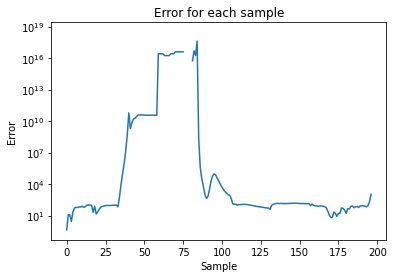

[[311.33966064   0.         261.8531189 ]
 [  0.         319.63674927 217.20277405]
 [  0.           0.           1.        ]]
[[ 0.0492004 ]
 [ 0.20271458]
 [-0.00642521]
 [ 0.18347827]
 [ 0.03126838]]


In [ ]:
print(predicted_parameters_mean)

# Run the model on the input_3d_points
predicted_2d_points = apply_camera_model(predicted_parameters_mean, input_3d_points)
# Plot the error for each sample
errors = predicted_2d_points - target_2d_points
errors = torch.norm(errors, dim=1)
errors = errors.cpu().detach().numpy()
plt.plot(errors)
plt.xlabel('Sample')
plt.ylabel('Error')
plt.title('Error for each sample')
plt.yscale('log')
plt.show()

predicted_params_mean_numpy = predicted_parameters_mean.cpu().detach().numpy()[0]
f_x = predicted_params_mean_numpy[0]
f_y = predicted_params_mean_numpy[1]
c_x = predicted_params_mean_numpy[2]
c_y = predicted_params_mean_numpy[3]
k1 = predicted_params_mean_numpy[4]
k2 = predicted_params_mean_numpy[5]
k3 = predicted_params_mean_numpy[6]
p_1 = predicted_params_mean_numpy[7]
p_2 = predicted_params_mean_numpy[8]

K_predicted = np.array([[f_x, 0, c_x],
                    [ 0, f_y, c_y],
                    [ 0, 0, 1 ]])

D_predicted = np.array([[k1],
                    [k2],
                    [k3],
                    [p_1],
                    [p_2]])

print(K_predicted)
print(D_predicted)

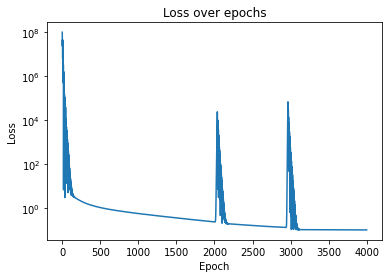

In [ ]:
#print(predicted_parameters)

# Plot the loss
plt.plot(loss_array)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss over epochs')
plt.yscale('log')
plt.show()




In [ ]:
def apply_camera_model_single_image(predicted_params, points_3d):
    """
    Apply the camera model to project 3D points to 2D using predicted camera parameters.
    
    :param predicted_params: numpy array containing the predicted camera parameters [f_x, f_y, c_x, c_y, k1, k2, k3, p_1, p_2] : [9,]
    :param points_3d: numpy array containing 3D points in camera coordinates, shape [3,]
    :return: numpy array containing the projected 2D points, shape [2,]
    """
    f_x, f_y, c_x, c_y, k1, k2, k3, p_1, p_2 = predicted_params

    # Normalize 3D points (X_c/Z_c, Y_c/Z_c)
    X_c, Y_c, Z_c = points_3d
    x_normalized = X_c / Z_c
    y_normalized = Y_c / Z_c
    
    # Compute r^2 = x_normalized^2 + y_normalized^2
    r_squared = x_normalized**2 + y_normalized**2
    
    # Apply radial distortion correction
    radial_factor = 1 + k1 * r_squared + k2 * r_squared**2 + k3 * r_squared**3
    x_radial = x_normalized * radial_factor
    y_radial = y_normalized * radial_factor
    
    # Apply tangential distortion correction
    x_tangential = 2 * p_1 * x_normalized * y_normalized + p_2 * (r_squared + 2 * x_normalized**2)
    y_tangential = p_1 * (r_squared + 2 * y_normalized**2) + 2 * p_2 * x_normalized * y_normalized
    
    # Combine radial and tangential distortions
    x_distorted = x_radial + x_tangential
    y_distorted = y_radial + y_tangential
    
    # Convert distorted coordinates back to pixel coordinates
    u = f_x * x_distorted + c_x
    v = f_y * y_distorted + c_y
    
    # Normalise the points
    img_width = 240
    img_height = 520
    u = u / img_width
    v = v / img_height
    
    # Stack the 2D points into a single numpy array
    points_2d = np.array([u, v])

    return points_2d

Input 3D point: tensor([1.3826, 5.7955, 1.0468])
Target 2D point: tensor([0.9583, 0.3000])
(3,)
(9,)
Error for image 0: 0.4279850977312165
Predicted 2D point: [0.66164092 0.60845563]
Target 2D point: [0.9583333 0.3      ]
Error for image 1: 11.672270713917092
Predicted 2D point: [ -4.30258359 -10.11996928]
Target 2D point: [0.9458333  0.30576923]
Error for image 2: 11.600349886386548
Predicted 2D point: [ -4.02781943 -10.17425442]
Target 2D point: [0.9458333  0.30576923]
Error for image 3: 2.745714471901294
Predicted 2D point: [-0.23421578 -2.17343065]
Target 2D point: [0.9458333  0.30576923]
Error for image 4: 22.231093592946706
Predicted 2D point: [ 8.93285478 21.05255237]
Target 2D point: [0.9458333  0.30576923]
Error for image 5: 52.682246625508846
Predicted 2D point: [18.41277378 50.00813438]
Target 2D point: [0.9458333  0.30576923]
Error for image 6: 60.980615116130636
Predicted 2D point: [19.6987663  58.33130607]
Target 2D point: [0.9458333  0.30576923]
Error for image 7: 58.562

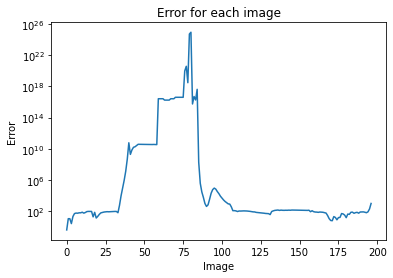

In [ ]:
# Test with one data point

# Get the first data point
input_3d_point = input_3d_points[0]
target_2d_point = target_2d_points[0]
print('Input 3D point:', input_3d_point)
print('Target 2D point:', target_2d_point)
input_3d_point_numpy = input_3d_point.cpu().detach().numpy()
print(np.shape(input_3d_point_numpy))
print(np.shape(predicted_params_mean_numpy))


# Loop over each image and find error
error_array = []
for i in range(len(points3D_drone_XYZ)):
    input_3d_point = input_3d_points[i]
    target_2d_point = target_2d_points[i]
    predicted_2d_point = apply_camera_model_single_image(predicted_params_mean_numpy, input_3d_point.cpu().detach().numpy())
    error = np.linalg.norm(predicted_2d_point - target_2d_point.cpu().detach().numpy())
    print(f'Error for image {i}: {error}')
    print(f'Predicted 2D point: {predicted_2d_point}')
    print(f'Target 2D point: {target_2d_point.cpu().detach().numpy()}')
    error_array.append(error)
# Plot the error array
plt.plot(error_array)
plt.xlabel('Image')
plt.ylabel('Error')
plt.title('Error for each image')
plt.yscale('log')
plt.show()